<a href="https://colab.research.google.com/github/Ben-Judas/Customer-Churn-Analysis/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHURN CUSTOMER ANALYSIS

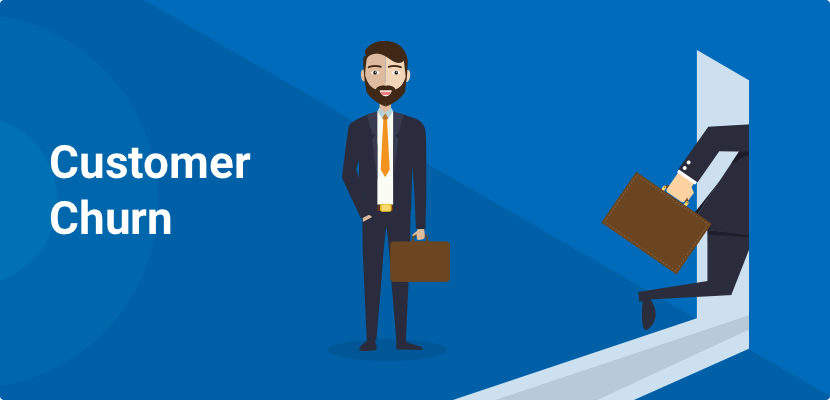

# TABLE OF CONTENTS

# INTRODUCTION

Customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period

# METHODOLOGY
Step 1: Business Understanding

*   Business Problem
*   Business Objective
*   Modeling Goals

Step 2: Data Understanding

*   Information on Data Source
*   Information on variables

Step 3: Data Preparation

*   Select/Get Data
*   Analyze and Transform Variables
*   Random Sampling


Step 4: Modeling

*   Model Selection and Develop Models (Training)
*   Validate and Optimize Models  (Testing)

Step 5: Evaluation

Step 6: Data Presentation

Step 7: Documentation

##### Data Modelling Process
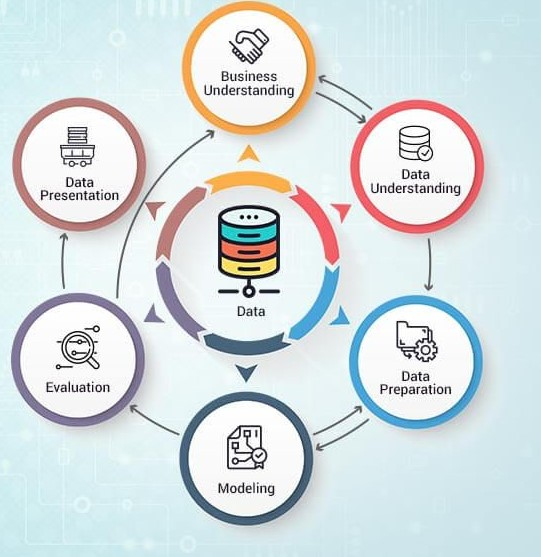

# STEP 1. BUSINESS UNDERSTANDING

## 1.1.Business Problem

The leading telecom company has a massive market share but one big problem: 

several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers. Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. 

The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.

The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They have a dataset of 7,000 customers. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.The data also offers demographic data and data on the services that each customer purchases.Finally there is information on the payments those customers make.
    

## 1.2. Business Objectives

What product features will cause customers to leave ?

How to use the findings from the data to help the company retain customers ?

## 1.3. Deliverables

       1.  A clear summary of the business task
       2.  A Documentation of any cleaning or manipulation of data
       3.  A summary of analysis
       4.  Supporting visualizations and key findings
       5.  Recommendations based on the analysis

### 1.3.1. FAQ

Tell a story to the marketing team to help them understand the customerswho churn and what the marketing team can do to prevent it. Highlight the information with helpful visualizations.

    1.How much is churn affecting the business? How big is churn compared to the existingcustomer base?

    2.Explain churn by the below categories. Are there any factors that combine to be especially impactful
    
        a. Customer demographics like age and gender
        b. Services used
        c. Billing information

    3.What services are typically purchased by     customerswho churned? Are any services 
    especially helpful in retaining customers?

    4.Bonus!How long will it take for the company to lose all its customers?  Which demographics will they lose first?

### 1.3.2. FAQ

Add to your presentation from Week 1. Create analyses that answer the following questions:

      1. Are there types of people who churn at higher rates? Come up with 2-3 profiles to give executives an idea of who churns often. Try to look several factors deep for example: people with no internet service and no phone service, or women who are senior citizens See FAQ for details.

      2. Do you have any recommendations on how to reach groups of people who churn at high rates?

      3. Create a case study for one of your customer profiles. Show how much additional revenue you could make by increasing sales by 10% in that profile.

      4. Bonus! Use a clustering algorithm like K-Means to break customers into groups.
          a. How many groups did you build and how did you decide on that number of groups?

          b. How does churn vary by group?
          c. How is this similar or different to your analysis without using Machine Learning 
    

### 1.3.3. FAQ

      1. What is a customer profile ? 
      2. It’s a device used to tell a story about customers by providing an example of what a typical customer is.

      A commonly used visualization for a customer profile is a radar chart, but feel free to create your own.

## 1.3. Modelling Goals
My work is to :

    1. Help them identify the types of customers who churn

    2. Predict who of their current customers will churn next month.

#STEP 2. DATA UNDERSTANDING



*   Data Sources

*   Information on variable

CustomerID: Customer ID unique for each customer

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependent: Whether the customer has dependents or not (Yes, No)

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two years)

PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

# COMPREHENSION
## TELCO
TELCO is a companie specialized in mobile telecommunications who provides a full range of products and services, including wireless network, internet, TV, cell phone Some.

# EXPLORATORY DATA ANALYSIS (EDA)





# 1 - PACKAGES AND DATA IMPORT

## 1.1 - Packages

In [78]:
# Packages for data manipulation

import pandas as pd
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Plot
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Statistics packages 
import scipy.stats as stats

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report
# data modeling II
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
# python parameters
import warnings
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')


## 1.2 - Data acquisition

In [81]:
# import and read the file from a local host
df = pd.read_csv("Telco-Customer-Churn.csv")

## 1.3 - Data Reading

In [82]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
def grab_cols(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns  # Categorical
                if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns
                   if dataframe[col].nunique() < cat_th and  # Numeric but categorical
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns
                   if dataframe[col].nunique() > car_th and  # Categorical but high cardinal
                   dataframe[col].dtypes == "O"]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes not in ['O', 'datetime64[ns]'] and
                dataframe[col].nunique() > 10]  # Numeric
    return cat_cols, num_but_cat, cat_but_car, num_cols

In [84]:
cat_cols, num_but_cat, cat_but_car, num_cols = grab_cols(df)

In [85]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [86]:
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
                    ... 
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
Length: 21, dtype: int64


##1.4 Data Preparation

In [87]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
# Check for duplicated columns
df[df.duplicated()].sum()

customerID         0.00
gender             0.00
SeniorCitizen      0.00
Partner            0.00
Dependents         0.00
                   ... 
PaperlessBilling   0.00
PaymentMethod      0.00
MonthlyCharges     0.00
TotalCharges       0.00
Churn              0.00
Length: 21, dtype: float64

In [89]:
#converting senior citizen into category
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1,"Yes")
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0,"No")
#df['TotalCharges'] = df['TotalCharges'].astype(float)
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors = "coerce")
# df.drop('customerID', axis = 1, inplace= True)

In [90]:
Churn = df.groupby(by=['Churn'])['Churn'].size().to_frame()
Churn.columns = ['Total']
Churn['%'] = Churn/df.shape[0]
Churn

,Total,%
Churn,,
No,5174,0.73
Yes,1869,0.27


In [91]:
# Plot Pie Chart
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

In [92]:
pie_plot(df["Churn"].value_counts(), plot_title="Customer Churn Distribution")

In [93]:
Partner = df.groupby(by=['Churn','Partner']).size().to_frame()
Partner.columns = ['Total']
Partner['%'] = round(Partner/df.shape[0],2)*100
Partner

Total     %
Churn Partner             
No    No        2441 35.00
      Yes       2733 39.00
Yes   No        1200 17.00
      Yes        669  9.00

# 2 - DATA CLEANING

##2.1 Data Checking

In [94]:
# shape of the dataset
df.shape

(7043, 21)

In [95]:
# columns of the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [96]:
# Check null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
                    ..
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Length: 21, dtype: int64

In [97]:
# display the dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
# verify there are no duplicated values
#df.customerID.nunique()

In [99]:
# count unique column values
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 73
PhoneService = 2
MultipleLines = 3
InternetService = 3
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6530
Churn = 2


In [100]:
# display values of tenure columns
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [101]:
# categorical function for tenure columns
def tenure_cat(x, errors = "coerce"):
  if x <= 12:
    return '-12 month'
  if 13 < x <= 24:
    return '13-24 month'
  if 25 < x <= 36:
    return '25-36 month'
  if 37 < x <= 48:
    return '37-48 month'
  if x > 48:
    return '+48 month'

In [102]:
# apply the tenure function
df['ten_group']=df['tenure'].apply(tenure_cat)
df['ten_group'].head()

0      -12 month
1    25-36 month
2      -12 month
3    37-48 month
4      -12 month
Name: ten_group, dtype: object

In [103]:
for col in df.iloc[:,1:].columns:
  if df[col].dtype == "object":
    df[col] = df[col].astype('category')


In [104]:
# phone service, internet service, online security, online backup, deviceprotection,
#tech support, streaming tv, streming movies, contract, monthly charge, total charge
# papeerless billing, monthly charges, total charges.

In [105]:
# make changes in a new column

#save old values in a new columns
df["internet service type"] = df.InternetService

#change the new column in a dichotomic variable: Yes: they use internet services. No: they dont
dic = {'No internet service': 'No', 'No phone service': 'No', 'DSL':'Yes', 'Fiber optic': 'Yes'}
df.InternetService.replace(dic, inplace=True)

# make changes in some columns

df["PhoneService"] = df["PhoneService"].replace({1:'Yes', 0:'No'})
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:'Yes', 0:'No'})

In [106]:
# count column values
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 73
PhoneService = 2
MultipleLines = 3
InternetService = 2
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6530
Churn = 2
ten_group = 5
internet service type = 3


In [107]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'ten_group', 'internet service type'],
      dtype='object')

In [108]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ten_group,internet service type
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,-12 month,DSL
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36 month,DSL
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-12 month,DSL
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48 month,DSL
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,-12 month,Fiber optic


In [109]:
# Creating list utilities...
service = ['customerID', 'TechSupport','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','PhoneService', 'MultipleLines','StreamingTV', 'StreamingMovies', 'Churn', 'InternetService'] 
customer=['customerID', 'SeniorCitizen','gender', 'Partner', 'Dependents','tenure','ten_group','PaymentMethod', 'Contract','Churn']
billing=['customerID','MonthlyCharges','TotalCharges','Churn']

In [110]:
# Creating list utilities...
cosservice = ['SeniorCitizen', 'TechSupport','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','PhoneService', 'MultipleLines',
          'StreamingTV', 'StreamingMovies', "InternetService"]
customerchar=['SeniorCitizen','gender', 'Partner', 'Dependents','ten_group','PaymentMethod', 'Contract']
billingcharges=['MonthlyCharges','TotalCharges']

In [111]:
# service subset
df[service].head()

,customerID,TechSupport,OnlineSecurity,OnlineBackup,DeviceProtection,PhoneService,MultipleLines,StreamingTV,StreamingMovies,Churn,InternetService
0,7590-VHVEG,No,No,Yes,No,No,No phone service,No,No,No,Yes
1,5575-GNVDE,No,Yes,No,Yes,Yes,No,No,No,No,Yes
2,3668-QPYBK,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
3,7795-CFOCW,Yes,Yes,No,Yes,No,No phone service,No,No,No,Yes
4,9237-HQITU,No,No,No,No,Yes,No,No,No,Yes,Yes


In [112]:
# customer subset
df[customer].tail()

,customerID,SeniorCitizen,gender,Partner,Dependents,tenure,ten_group,PaymentMethod,Contract,Churn
7038,6840-RESVB,No,Male,Yes,Yes,24,13-24 month,Mailed check,One year,No
7039,2234-XADUH,No,Female,Yes,Yes,72,+48 month,Credit card (automatic),One year,No
7040,4801-JZAZL,No,Female,Yes,Yes,11,-12 month,Electronic check,Month-to-month,No
7041,8361-LTMKD,Yes,Male,Yes,No,4,-12 month,Mailed check,Month-to-month,Yes
7042,3186-AJIEK,No,Male,No,No,66,+48 month,Bank transfer (automatic),Two year,No


In [113]:
# billing subset
df[billing].head()

,customerID,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,29.85,29.85,No
1,5575-GNVDE,56.95,1889.50,No
2,3668-QPYBK,53.85,108.15,Yes
3,7795-CFOCW,42.30,1840.75,No
4,9237-HQITU,70.70,151.65,Yes


# 3-DESCRIPTIVE ANALYSIS

# 3.1-Descriptive Analysis of Services

In [114]:
def custo(x):
    """
    This function is created in order to make univariate analysis
    It creates barplot to show distribution of customer from a frequencies table

    """
    # Frequences table
    custo = pd.DataFrame(df.groupby(x)[['customerID']].count())

    ax1 = plt.figure(figsize=(10,8))
    plt.bar(custo.index, custo['customerID'] ,color = ['coral','grey','red'], edgecolor="black")
    plt.title('Distribution of customers by '+ x,size=12)

    # Show the proportions
    for i in range(len(custo['customerID'])):
       plt.text(i,0.1, str(round(custo['customerID'].values[i]/df.shape[0], 2))+"%", fontsize =12, horizontalalignment='center', verticalalignment='baseline')
    
    #Save the graph
    plt.savefig('Distribution of customers by '+ x + ".png")
    return custo

,customerID
SeniorCitizen,
No,5901
Yes,1142


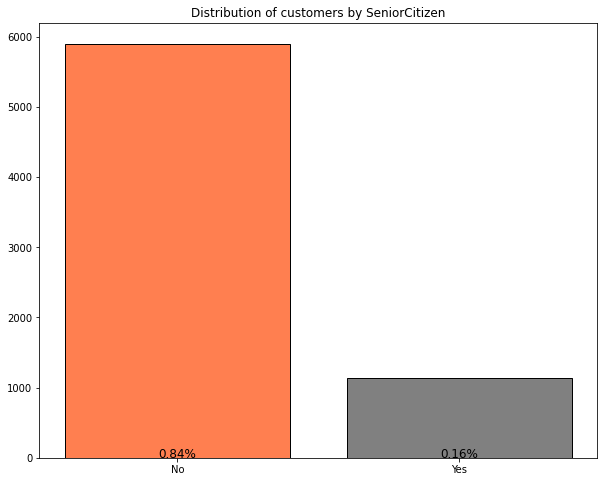

In [115]:
custo('SeniorCitizen')

,customerID
StreamingMovies,
No,2785
No internet service,1526
Yes,2732


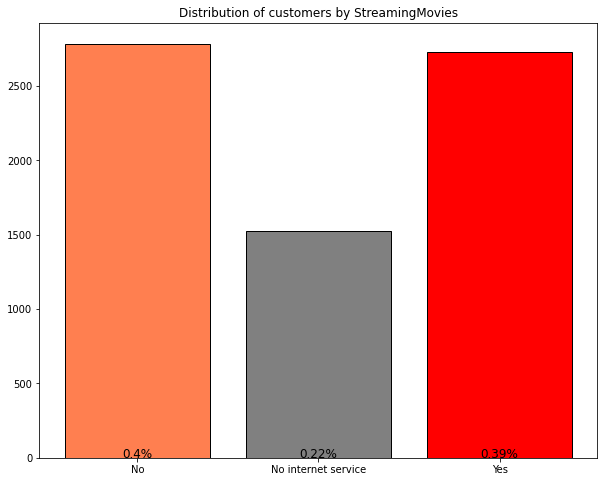

In [116]:
custo('StreamingMovies')

,customerID
TechSupport,
No,3473
No internet service,1526
Yes,2044


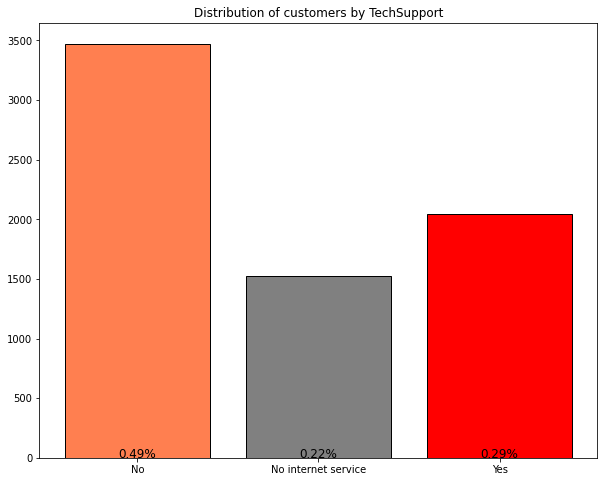

In [117]:
custo('TechSupport')

,customerID
OnlineSecurity,
No,3498
No internet service,1526
Yes,2019


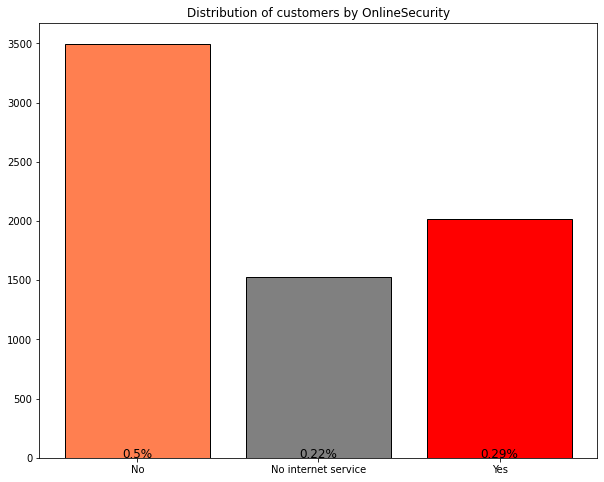

In [118]:
custo('OnlineSecurity')

,customerID
MultipleLines,
No,3390
No phone service,682
Yes,2971


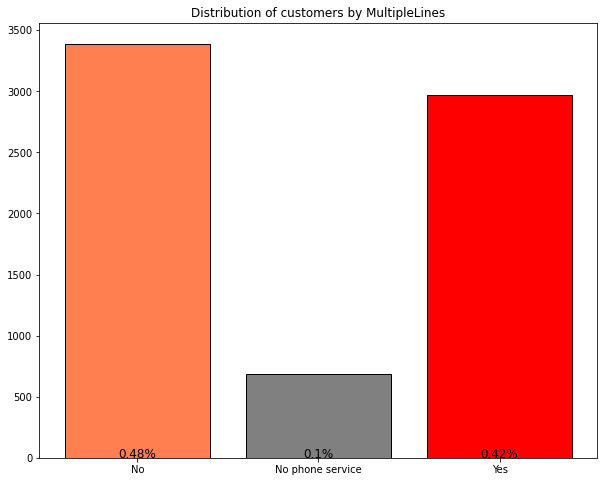

In [119]:
custo( 'MultipleLines')

,customerID
PhoneService,
No,682
Yes,6361


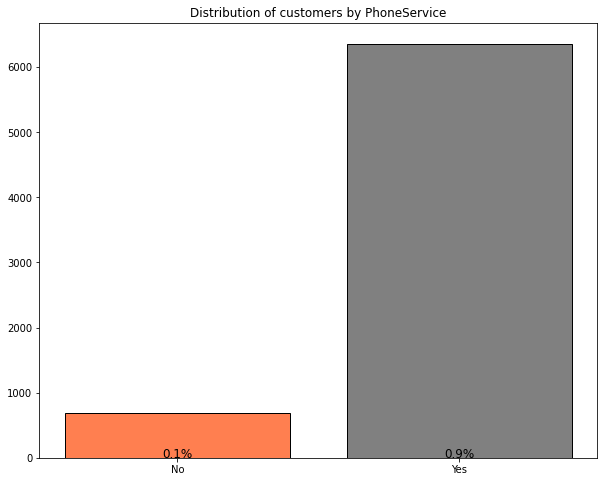

In [120]:
custo('PhoneService')

,customerID
OnlineBackup,
No,3088
No internet service,1526
Yes,2429


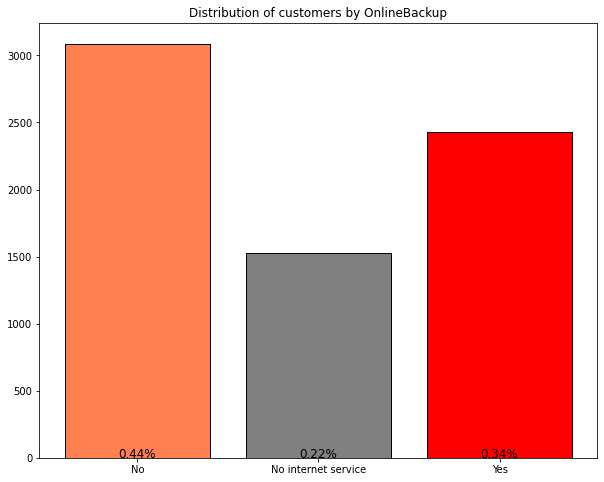

In [121]:
custo('OnlineBackup')

,customerID
DeviceProtection,
No,3095
No internet service,1526
Yes,2422


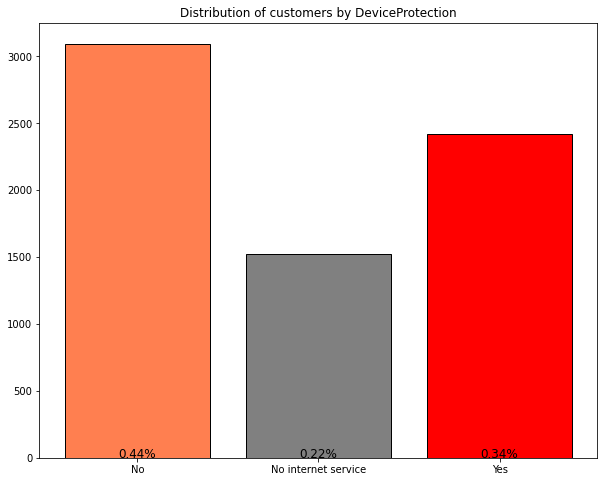

In [122]:
custo('DeviceProtection')

# 3.2-Descriptive Analysis of Customer's characteristics

,customerID
gender,
Female,3488
Male,3555


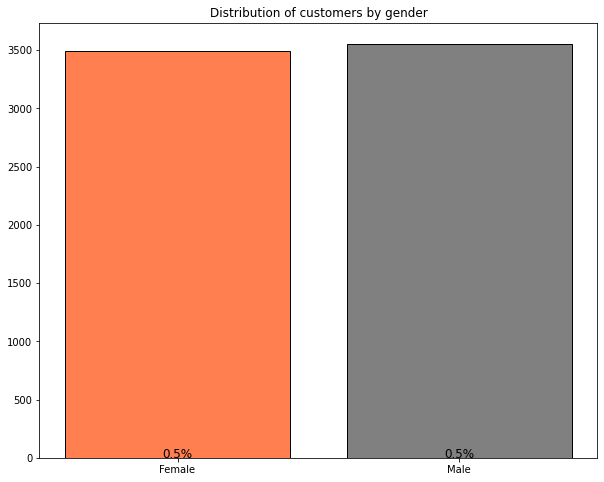

In [123]:
custo('gender')


,customerID
SeniorCitizen,
No,5901
Yes,1142


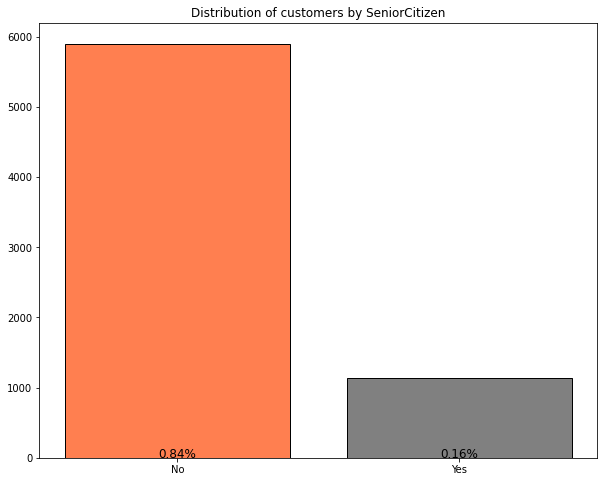

In [124]:
custo('SeniorCitizen')

,customerID
Contract,
Month-to-month,3875
One year,1473
Two year,1695


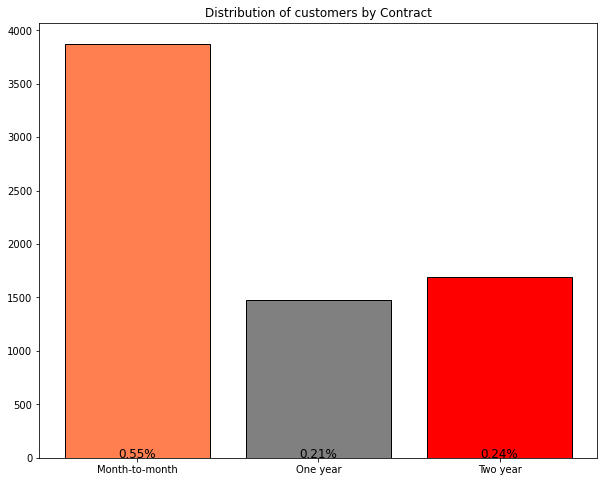

In [125]:
custo('Contract')

,customerID
PaymentMethod,
Bank transfer (automatic),1544
Credit card (automatic),1522
Electronic check,2365
Mailed check,1612


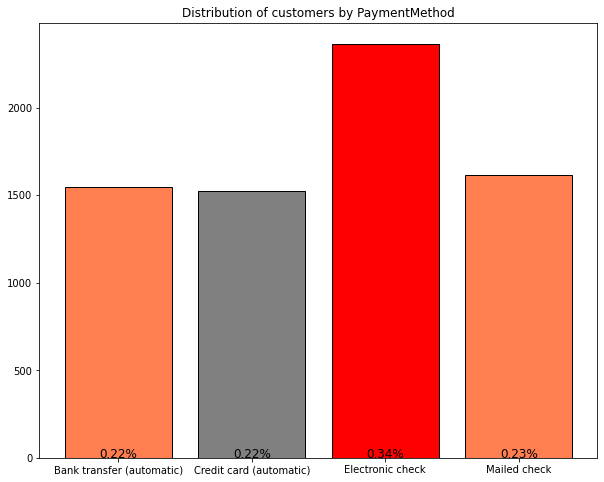

In [126]:
custo('PaymentMethod')

,customerID
ten_group,
+48 month,2239
-12 month,2186
13-24 month,915
25-36 month,753
37-48 month,697


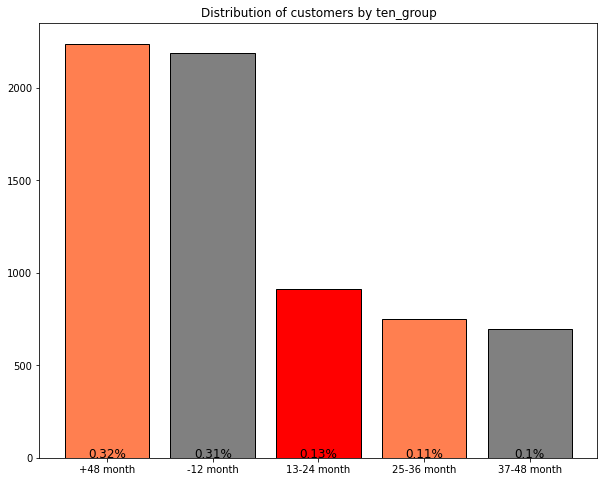

In [127]:
custo('ten_group')

,customerID
Partner,
No,3641
Yes,3402


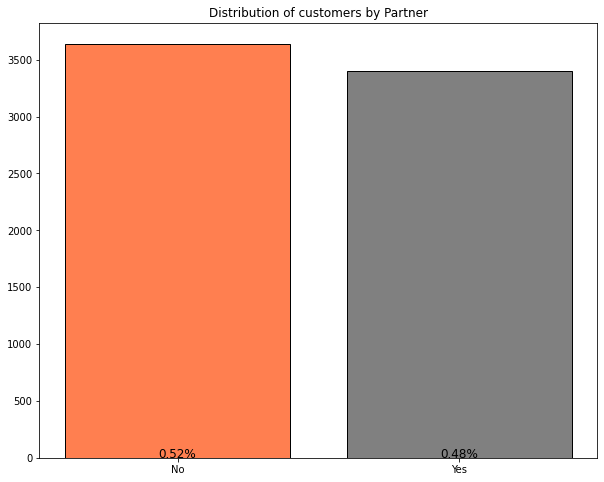

In [128]:
custo('Partner')

,customerID
Dependents,
No,4933
Yes,2110


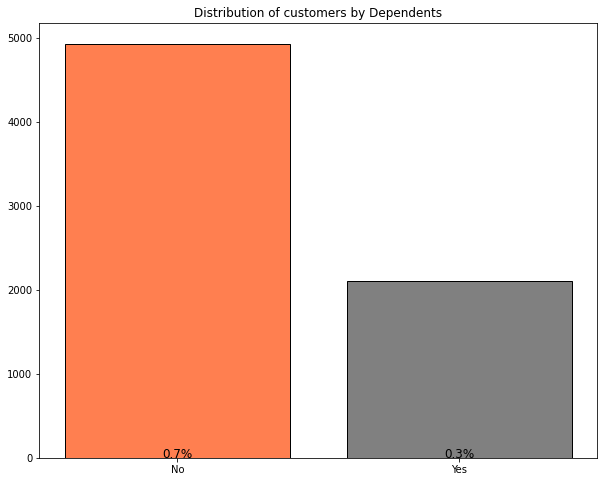

In [129]:
custo('Dependents')

# B. IMPACT OF CHURN CUSTOMER ON BUSINESS

# 1-BIVARIATE ANALYSIS

## 1.1-How much is churn affecting the business

In [130]:
#Table with total and monthly charges calculated for customer that move out and those who dont

churn_by_billing=df[billing].groupby(['Churn']).sum('MonthlyCharges').reset_index()
display(churn_by_billing)

,Churn,MonthlyCharges,TotalCharges
0,No,316985.75,13193241.80
1,Yes,139130.85,2862926.90


In [131]:
churn_by_billing.at[1, 'TotalCharges']

2862926.8999999985

## 1.2-How much is churn affecting customer base  

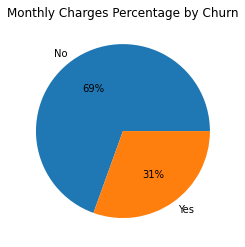

In [132]:
#Pie chart for monthly charges 

plt.pie(churn_by_billing['MonthlyCharges'], labels=churn_by_billing.Churn, autopct='%.0f%%')
plt.title("Monthly Charges Percentage by Churn")
plt.savefig("Monthly Charges Percentage by Churn.png")
plt.show()

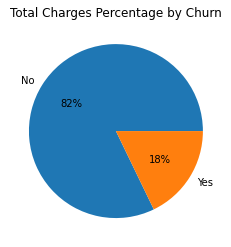

In [133]:
#Pie for total charge

plt.pie(churn_by_billing['TotalCharges'], labels=churn_by_billing.Churn, autopct='%.0f%%')
plt.title("Total Charges Percentage by Churn")
plt.savefig("Total Charges Percentage by Churn.png")
plt.show()

In [134]:
# create a df for the customer who move out

mon=df['Churn']=='Yes'
yes = df[mon]
yes.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ten_group,internet service type
7021,1699-HPSBG,Male,No,No,No,12,Yes,No,Yes,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,-12 month,DSL
7026,8775-CEBBJ,Female,No,No,No,9,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,-12 month,DSL
7032,6894-LFHLY,Male,Yes,No,No,1,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,-12 month,Fiber optic
7034,0639-TSIQW,Female,No,No,No,67,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,+48 month,Fiber optic
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,-12 month,Fiber optic


## 1.3-How big is churn compared to the existing customer base

In [135]:

def pivo(x):

  """ This function allow us to do a Pivot Table by customer caracteristics
  the caracteristics is stored in the parameter x.
  """
  
  new_pivot=pd.pivot_table(df, values='customerID', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='count')
  new_pivot=new_pivot.fillna(0)
  return np.round(new_pivot/df.shape[0]*100,2)

In [136]:
pivo('SeniorCitizen')

SeniorCitizen,No,Yes
Churn,,
No,64.01,9.46
Yes,19.78,6.76


In [137]:
def pivomoney(x):

  """ This function allow us to do a Pivot Table by charges
  the charges is stored in the parameter x"""
  
  new_pivot=pd.pivot_table(df, values='MonthlyCharges', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='sum')
  new_pivot=new_pivot.fillna(0)
  return new_pivot

In [138]:
print(f'Distribution in pourcentage of Churn by gender')
display(pivomoney('gender'))

Distribution in pourcentage of Churn by gender


gender,Female,Male
Churn,,
No,157183.85,159801.90
Yes,70248.55,68882.30


In [139]:
def pivototal(x):

  """ This function allow us to do a Pivot Table"""
  
  new_pivot=pd.pivot_table(df, values='TotalCharges', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='sum')
  new_pivot=new_pivot.fillna(0)
  #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return round(new_pivot/16056168.7*100,2)

In [140]:
def pivomonth(x):

  """ This function allow us to do a Pivot Table by customer charges
  the charges is stored in the parameter x"""
  
  new_pivot=pd.pivot_table(df, values='MonthlyCharges', 
                    index=['Churn'],
                    columns=x,
                    aggfunc='sum')
  new_pivot=new_pivot.fillna(0)
  return round(new_pivot/456116.60*100,2)

In [141]:
pivomonth('SeniorCitizen')

SeniorCitizen,No,Yes
Churn,,
No,57.93,11.56
Yes,22.08,8.42


In [142]:
cond = df['Churn']=='Yes'
display(df[cond].head(), df[cond].shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ten_group,internet service type
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-12 month,DSL
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,-12 month,Fiber optic
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,-12 month,Fiber optic
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25-36 month,Fiber optic
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,+48 month,Fiber optic


(1869, 23)

## 1.4-What services are typically purchased by customers who churned

In [143]:
for col in cosservice:
  print(f'\n\nDistribution in pourcentage of MonthlyCharges by Churned {col}')
  display(pivomonth(col))



Distribution in pourcentage of MonthlyCharges by Churned SeniorCitizen


SeniorCitizen,No,Yes
Churn,,
No,57.93,11.56
Yes,22.08,8.42




Distribution in pourcentage of MonthlyCharges by Churned TechSupport


TechSupport,No,No internet service,Yes
Churn,,,
No,32.52,6.55,30.43
Yes,24.27,0.50,5.73




Distribution in pourcentage of MonthlyCharges by Churned OnlineSecurity


OnlineSecurity,No,No internet service,Yes
Churn,,,
No,33.33,6.55,29.62
Yes,24.72,0.50,5.28




Distribution in pourcentage of MonthlyCharges by Churned OnlineBackup


OnlineBackup,No,No internet service,Yes
Churn,,,
No,28.56,6.55,34.39
Yes,20.14,0.50,9.86




Distribution in pourcentage of MonthlyCharges by Churned DeviceProtection


DeviceProtection,No,No internet service,Yes
Churn,,,
No,28.45,6.55,34.50
Yes,19.46,0.50,10.54




Distribution in pourcentage of MonthlyCharges by Churned PhoneService


PhoneService,No,Yes
Churn,,
No,4.89,64.61
Yes,1.40,29.10




Distribution in pourcentage of MonthlyCharges by Churned MultipleLines


MultipleLines,No,No phone service,Yes
Churn,,,
No,27.77,4.89,36.84
Yes,12.51,1.40,16.60




Distribution in pourcentage of MonthlyCharges by Churned StreamingTV


StreamingTV,No,No internet service,Yes
Churn,,,
No,26.44,6.55,36.51
Yes,13.85,0.50,16.15




Distribution in pourcentage of MonthlyCharges by Churned StreamingMovies


StreamingMovies,No,No internet service,Yes
Churn,,,
No,26.08,6.55,36.87
Yes,13.87,0.50,16.13




Distribution in pourcentage of MonthlyCharges by Churned InternetService


InternetService,No,Yes
Churn,,
No,6.55,62.95
Yes,0.50,30.00


In [144]:
for col in cosservice:
  print(f'\n\nDistribution in pourcentage of TotalCharges by Churned {col}')
  display(pivototal(col))



Distribution in pourcentage of TotalCharges by Churned SeniorCitizen


SeniorCitizen,No,Yes
Churn,,
No,67.68,14.49
Yes,12.33,5.50




Distribution in pourcentage of TotalCharges by Churned TechSupport


TechSupport,No,No internet service,Yes
Churn,,,
No,32.59,6.18,43.41
Yes,12.60,0.12,5.10




Distribution in pourcentage of TotalCharges by Churned OnlineSecurity


OnlineSecurity,No,No internet service,Yes
Churn,,,
No,33.58,6.18,42.41
Yes,12.95,0.12,4.76




Distribution in pourcentage of TotalCharges by Churned OnlineBackup


OnlineBackup,No,No internet service,Yes
Churn,,,
No,26.39,6.18,49.61
Yes,8.76,0.12,8.95




Distribution in pourcentage of TotalCharges by Churned DeviceProtection


DeviceProtection,No,No internet service,Yes
Churn,,,
No,26.04,6.18,49.95
Yes,8.62,0.12,9.09




Distribution in pourcentage of TotalCharges by Churned PhoneService


PhoneService,No,Yes
Churn,,
No,5.63,76.54
Yes,0.73,17.10




Distribution in pourcentage of TotalCharges by Churned MultipleLines


MultipleLines,No,No phone service,Yes
Churn,,,
No,24.23,5.63,52.32
Yes,4.23,0.73,12.87




Distribution in pourcentage of TotalCharges by Churned StreamingTV


StreamingTV,No,No internet service,Yes
Churn,,,
No,25.10,6.18,50.89
Yes,5.26,0.12,12.45




Distribution in pourcentage of TotalCharges by Churned StreamingMovies


StreamingMovies,No,No internet service,Yes
Churn,,,
No,24.49,6.18,51.51
Yes,5.22,0.12,12.48




Distribution in pourcentage of TotalCharges by Churned InternetService


InternetService,No,Yes
Churn,,
No,6.18,75.99
Yes,0.12,17.71


In [145]:
def test(col, data = df):
  tb = pd.crosstab(df[col], df["Churn"], normalize=False)
  chi2, pval = chi2_contingency(tb)
  Null_Hypothesis = " are independent with a significance level of 95%."
  Alternative_Hypothesis = " are not independent with a significance level of 95%."
  if pval<0.05:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Alternative_Hypothesis}")
  else:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Null_Hypothesis}")

In [146]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [147]:
def test(col, data = df):
  tb = pd.pivot_table(df, values='MonthlyCharges', 
                    index=['Churn'],
                    columns=col,
                    aggfunc='sum')
  chi2, pval = chi2_contingency(tb)
  Null_Hypothesis = " are independent with a significance level of 95%."
  Alternative_Hypothesis = " are not independent with a significance level of 95%."
  if pval<0.05:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Alternative_Hypothesis}")
  else:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Null_Hypothesis}")

## 1.5-Are any services especially helpful in retaining customers